In [1]:
import ROOT
import numpy as np
import scipy
import matplotlib.pyplot as plt
from array import array

In [2]:
file_path = "../pythia8314/examples/first_attempt_500mm.root"

In [3]:
t1=ROOT.TChain("t1")

In [4]:
t1.AddFile(file_path)

1

In [5]:
## Define a new tree for other purposes

In [6]:
t2 = ROOT.TChain("t1")

In [7]:
t2.AddFile(file_path)

1

In [8]:
ientry = t1.GetEntries()
ientry

2526906

In [9]:
higgs_energy = []
higgs_process = []
higgs_phi = []
higgs_theta = []

In [10]:
final_higgs_energy = []
final_higgs_x = []
final_higgs_y = []
final_higgs_z = []
final_higgs_theta = []
final_higgs_phi = []

In [11]:
final_zb_energy = []
final_zb_x = []
final_zb_y = []
final_zb_z = []
final_zb_theta = []
final_zb_phi = []

In [12]:
for jentry in range(0,ientry):
    t1.GetEntry(jentry)
    if (t1.pid==25):
        flag = 0
        pos =  t1.list
        ml = t1.MotherList
        sl = t1.SisterList
        dl = t1.DaughterListRec
        mpid = []
        spid = []
        e= []
        ph= []
        th= []
        if(len(ml)==1): continue ##recoil effect is not included
        for i in range(0,len(dl)):
            t2.GetEntry(jentry-pos+dl[i])
            if(t2.pid==25):
                flag=flag+1
                e.append(t2.energy)
                ph.append(t2.phi)
                th.append(t2.theta)
        if(flag==0):
            e.append(t1.energy)
            ph.append(t1.phi)
            th.append(t1.theta)
                
        for i in range(0,len(ml)):
            t2.GetEntry(jentry-pos+ml[i])
            mpid.append(t2.pid)
        for i in range(0,len(sl)):
            t2.GetEntry(jentry-pos+sl[i])
            spid.append(t2.pid)
        higgs_process.append([mpid,spid,flag])
        higgs_energy.append(e)
        higgs_theta.append(th)
        higgs_phi.append(ph)


In [13]:
for jentry in range(0,ientry):
    t1.GetEntry(jentry)
    if(t1.pid==25):
        if(len(t1.MotherList)==1): continue
        dl = np.unique(t1.DaughterListRec)
        pos = t1.list
        for i in range(0,len(dl)):
            t2.GetEntry(jentry-pos+int(dl[i]))
            if(t2.isFinal==0): continue
            final_higgs_energy.append(t2.energy)
            final_higgs_x.append(t2.x)
            final_higgs_y.append(t2.y)
            final_higgs_z.append(t2.z)
            final_higgs_theta.append(t2.theta)
            final_higgs_phi.append(t2.phi)


In [14]:
for jentry in range(0,ientry):
    t1.GetEntry(jentry)
    if(t1.pid==23):
        if(len(t1.MotherList)==1): continue
        dl = np.unique(t1.DaughterListRec)
        pos = t1.list
        for i in range(0,len(dl)):
            t2.GetEntry(jentry-pos+int(dl[i]))
            if(t2.isFinal==0): continue
            final_zb_energy.append(t2.energy)
            final_zb_x.append(t2.x)
            final_zb_y.append(t2.y)
            final_zb_z.append(t2.z)
            final_zb_theta.append(t2.theta)
            final_zb_phi.append(t2.phi)

In [15]:
Nsim = len(higgs_energy)
Nsim

25000

In [16]:
diphoton = []
HZ_brem = []
Z_fusion = []
W_fusion = []
for i in range(0,Nsim):
    if(higgs_process[i][1]==[23]):
        HZ_brem.append(higgs_energy[i][-1])
    if(higgs_process[i][0]==[22,22]):
        diphoton.append(higgs_energy[i][-1])
    if(higgs_process[i][1]==[-11,11]):
        Z_fusion.append(higgs_energy[i][-1])
    if(higgs_process[i][1]==[-12,12]):
        W_fusion.append(higgs_energy[i][-1])

In [17]:
len(HZ_brem)+len(diphoton)+len(Z_fusion)+len(W_fusion)

25000

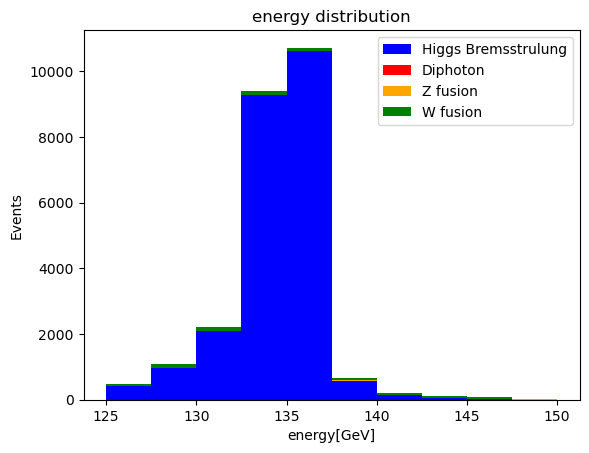

In [18]:
data = [HZ_brem,diphoton,Z_fusion,W_fusion]
colors = ["blue","red","orange","green"]
labels = ["Higgs Bremsstrulung", "Diphoton", "Z fusion","W fusion"]
plt.hist(data,stacked = True,bins=10,range = [125,150],color = colors, label = labels)
plt.title("energy distribution")
plt.xlabel("energy[GeV]")
plt.ylabel("Events")
plt.legend()
plt.savefig("higgs_energy_stack.pdf")

In [19]:
diphoton = []
HZ_brem = []
Z_fusion = []
W_fusion = []
for i in range(0,Nsim):
    if(higgs_process[i][1]==[23]):
        HZ_brem.append(higgs_theta[i][-1])
    if(higgs_process[i][0]==[22,22]):
        diphoton.append(higgs_theta[i][-1])
    if(higgs_process[i][1]==[-11,11]):
        Z_fusion.append(higgs_theta[i][-1])
    if(higgs_process[i][1]==[-12,12]):
        W_fusion.append(higgs_theta[i][-1])

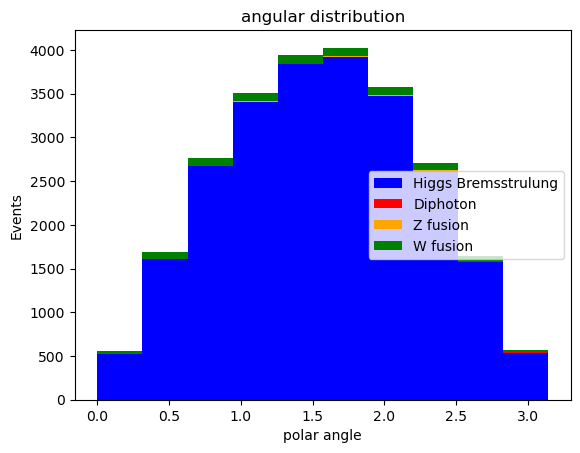

In [20]:
data = [HZ_brem,diphoton,Z_fusion,W_fusion]
colors = ["blue","red","orange","green"]
labels = ["Higgs Bremsstrulung", "Diphoton", "Z fusion","W fusion"]
plt.hist(data,stacked = True,bins=10,range = [0,3.142],color = colors, label = labels)
plt.title("angular distribution")
plt.xlabel("polar angle")
plt.ylabel("Events")
plt.legend()
plt.savefig("higgs_polar_stack.pdf")

In [21]:
diphoton = []
HZ_brem = []
Z_fusion = []
W_fusion = []
for i in range(0,Nsim):
    if(higgs_process[i][1]==[23]):
        HZ_brem.append(higgs_phi[i][-1])
    if(higgs_process[i][0]==[22,22]):
        diphoton.append(higgs_phi[i][-1])
    if(higgs_process[i][1]==[-11,11]):
        Z_fusion.append(higgs_phi[i][-1])
    if(higgs_process[i][1]==[-12,12]):
        W_fusion.append(higgs_phi[i][-1])

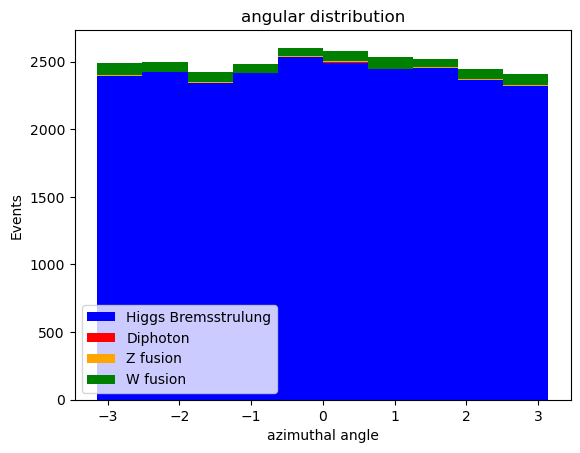

In [22]:
data = [HZ_brem,diphoton,Z_fusion,W_fusion]
colors = ["blue","red","orange","green"]
labels = ["Higgs Bremsstrulung", "Diphoton", "Z fusion","W fusion"]
plt.hist(data,stacked = True,bins=10,range = [-3.142,3.142],color = colors, label = labels)
plt.title("angular distribution")
plt.xlabel("azimuthal angle")
plt.ylabel("Events")
plt.legend()
plt.savefig("higgs_azimuthal_stack.pdf")

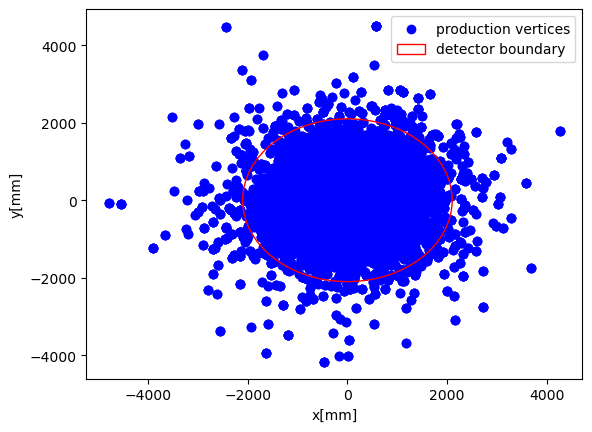

In [37]:
##scatter plot (x-y) for higgs product
ig, ax = plt.subplots()
plt.scatter(final_higgs_x,final_higgs_y,label = "production vertices",color = "blue")
plt.xlabel("x[mm]")
plt.ylabel("y[mm]")
circle1 = plt.Circle((0,0),2100,label = "detector boundary",color = "red",fill=False)
ax.add_patch(circle1)
plt.legend()
plt.savefig("Higgs_position_xy.pdf")

In [41]:
final_higgs_r = []
final_zb_r = []

In [42]:
for i in range(0,len(final_higgs_x)):
    final_higgs_r.append(np.sqrt(final_higgs_x[i]**2+final_higgs_y[i]**2))

In [43]:
for i in range(0,len(final_zb_x)):
    final_zb_r.append(np.sqrt(final_zb_x[i]**2+final_zb_y[i]**2))

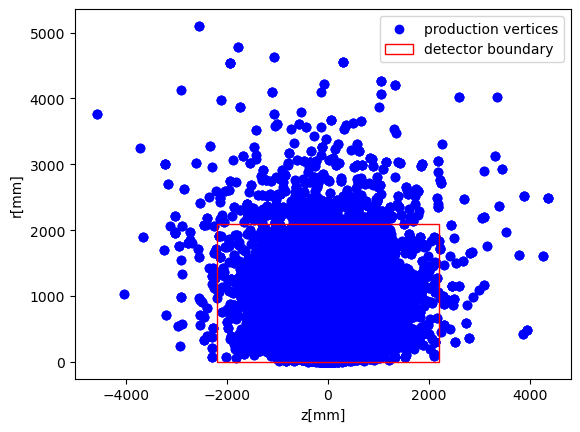

In [46]:
##scatter plot (z-r) for higgs product
ig, ax = plt.subplots()
plt.scatter(final_higgs_z,final_higgs_r,label = "production vertices",color = "blue")
plt.xlabel("z[mm]")
plt.ylabel("r[mm]")
rect1 = plt.Rectangle((-2200,0),4400,2100,label = "detector boundary",color = "red",fill=False)
ax.add_patch(rect1)
plt.legend()
plt.savefig("Higgs_position_zr.pdf")

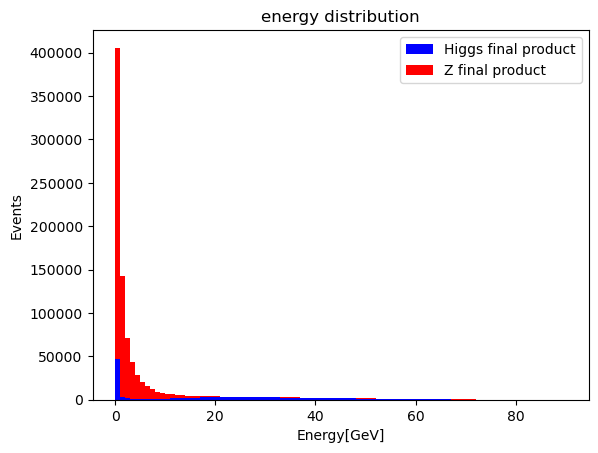

In [60]:
## energy distribution of final products as a stack:
data = [final_higgs_energy,final_zb_energy]
colors = ["blue","red"]
labels = ["Higgs final product","Z final product"]
plt.hist(data,stacked = True,bins=90,range = [0,90],color = colors, label = labels)
plt.title("energy distribution")
plt.xlabel("Energy[GeV]")
plt.ylabel("Events")
plt.legend()
plt.savefig("energy_stack.pdf")

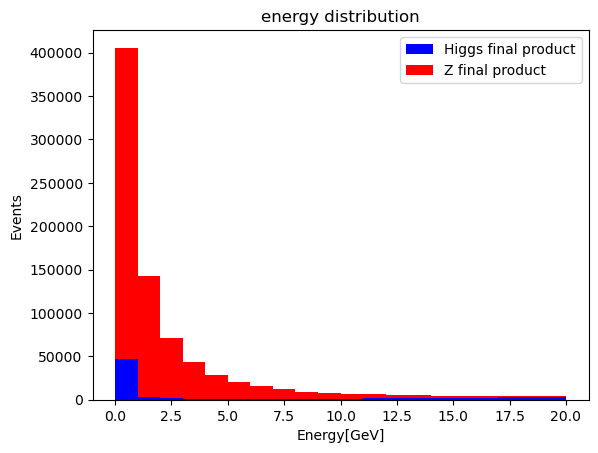

In [61]:
## energy distribution of final products as a stack:
data = [final_higgs_energy,final_zb_energy]
colors = ["blue","red"]
labels = ["Higgs final product","Z final product"]
plt.hist(data,stacked = True,bins=20,range = [0,20],color = colors, label = labels)
plt.title("energy distribution")
plt.xlabel("Energy[GeV]")
plt.ylabel("Events")
plt.legend()
plt.savefig("energy_stack_zoomed_0_20.pdf")

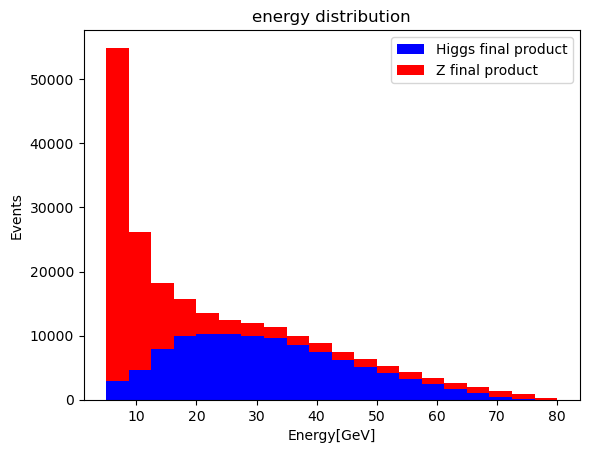

In [62]:
## energy distribution of final products as a stack:
data = [final_higgs_energy,final_zb_energy]
colors = ["blue","red"]
labels = ["Higgs final product","Z final product"]
plt.hist(data,stacked = True,bins=20,range = [5,80],color = colors, label = labels)
plt.title("energy distribution")
plt.xlabel("Energy[GeV]")
plt.ylabel("Events")
plt.legend()
plt.savefig("energy_stack_zoomed_5_80.pdf")

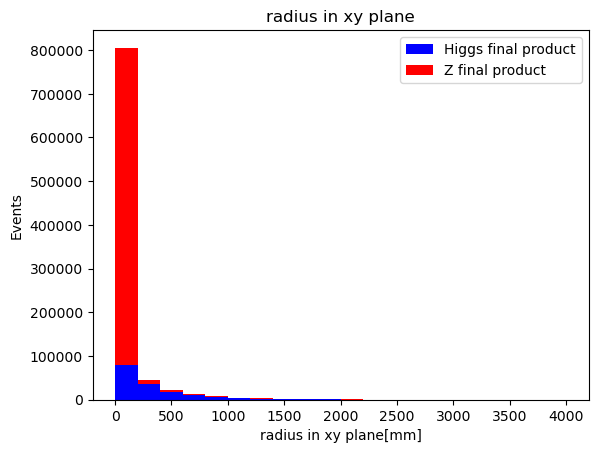

In [63]:
## radius (in xy plane) of final products as a stack:
data = [final_higgs_r,final_zb_r]
colors = ["blue","red"]
labels = ["Higgs final product","Z final product"]
plt.hist(data,stacked = True,bins=20,range = [0,4000],color = colors, label = labels)
plt.title("radius in xy plane")
plt.xlabel("radius in xy plane[mm]")
plt.ylabel("Events")
plt.legend()
plt.savefig("radius_in_xy.pdf")

In [80]:
final_zb_r_remove = []
final_zb_z_remove = []
for i in range(0,len(final_zb_r)):
    if(final_zb_r[i]<=0.1): continue
    else: final_zb_r_remove.append(final_zb_r[i])
for i in range(0,len(final_zb_z)):
    if(np.abs(final_zb_z[i])<=0.1): continue
    else: final_zb_z_remove.append(final_zb_z[i])
    

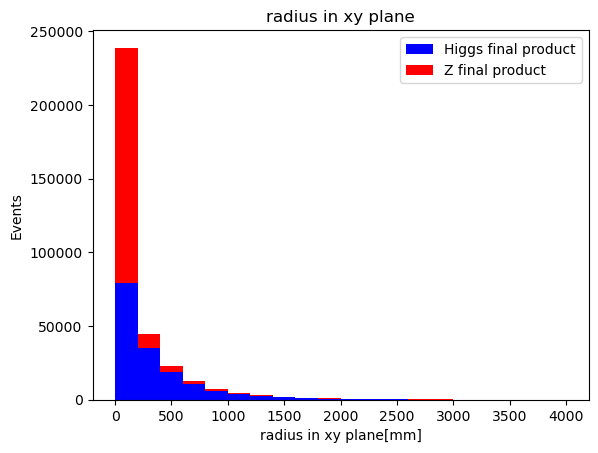

In [69]:
## radius (in xy plane) of final products as a stack:
data = [final_higgs_r,final_zb_r_remove]
colors = ["blue","red"]
labels = ["Higgs final product","Z final product"]
plt.hist(data,stacked = True,bins=20,range = [0,4000],color = colors, label = labels)
plt.title("radius in xy plane")
plt.xlabel("radius in xy plane[mm]")
plt.ylabel("Events")
plt.legend()
plt.savefig("radius_in_xy_removed.pdf")

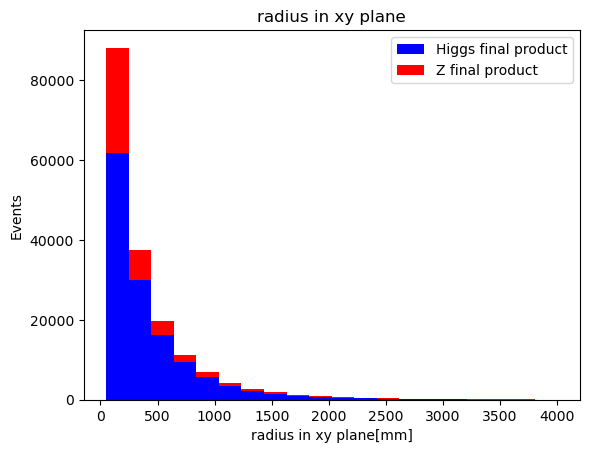

In [72]:
data = [final_higgs_r,final_zb_r_remove]
colors = ["blue","red"]
labels = ["Higgs final product","Z final product"]
plt.hist(data,stacked = True,bins=20,range = [50,4000],color = colors, label = labels)
plt.title("radius in xy plane")
plt.xlabel("radius in xy plane[mm]")
plt.ylabel("Events")
plt.legend()
plt.savefig("radius_in_xy_50_4000.pdf")

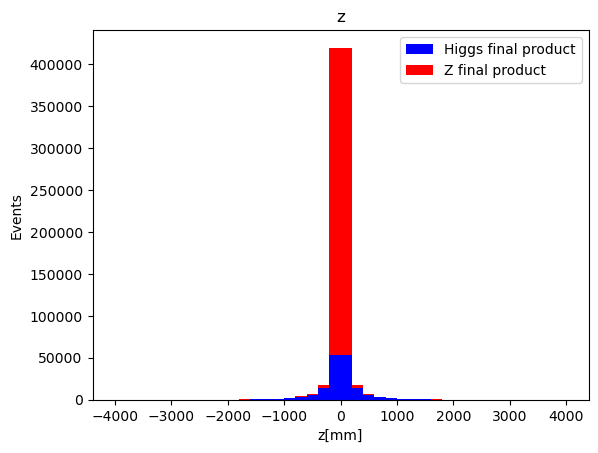

In [82]:
data = [final_higgs_z,final_zb_z]
colors = ["blue","red"]
labels = ["Higgs final product","Z final product"]
plt.hist(data,stacked = True,bins=40,range = [-4000,4000],color = colors, label = labels)
plt.title("z")
plt.xlabel("z[mm]")
plt.ylabel("Events")
plt.legend()
plt.savefig("z.pdf")

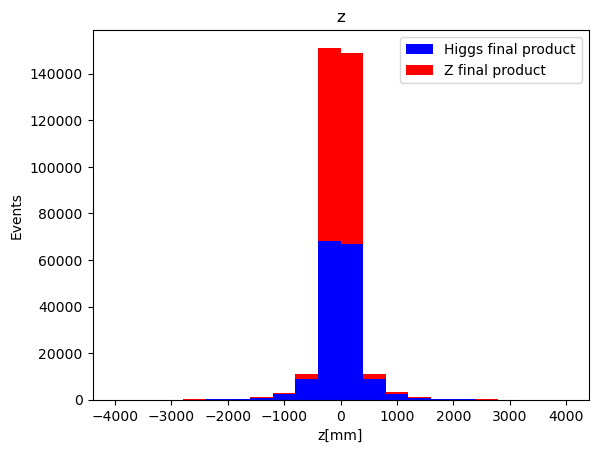

In [83]:
data = [final_higgs_z,final_zb_z_remove]
colors = ["blue","red"]
labels = ["Higgs final product","Z final product"]
plt.hist(data,stacked = True,bins=20,range = [-4000,4000],color = colors, label = labels)
plt.title("z")
plt.xlabel("z[mm]")
plt.ylabel("Events")
plt.legend()
plt.savefig("z_remove.pdf")

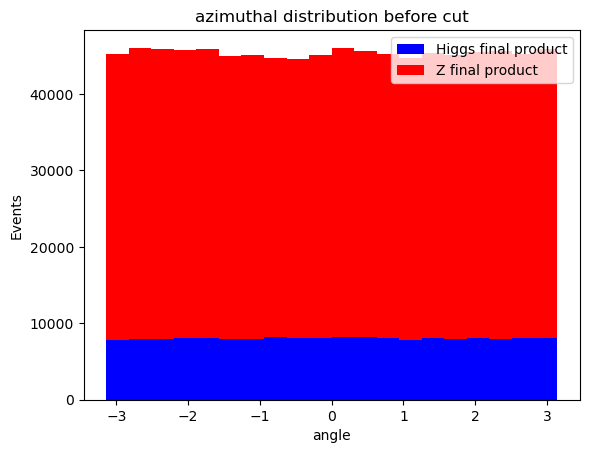

In [76]:
##Angular distribution azimuthal
data = [final_higgs_phi,final_zb_phi]
colors = ["blue","red"]
labels = ["Higgs final product","Z final product"]
plt.hist(data,stacked = True,bins=20,range = [-3.142,3.142],color = colors, label = labels)
plt.title("azimuthal distribution before cut")
plt.xlabel("angle")
plt.ylabel("Events")
plt.legend()
plt.savefig("angular distribution azimuthal.pdf")

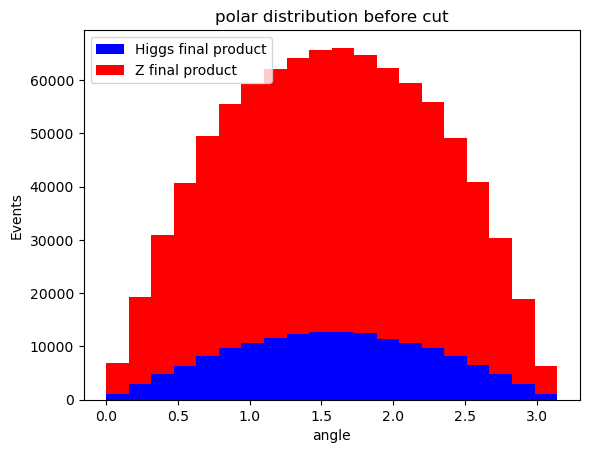

In [79]:
##Angular distribution polar
data = [final_higgs_theta,final_zb_theta]
colors = ["blue","red"]
labels = ["Higgs final product","Z final product"]
plt.hist(data,stacked = True,bins=20,range = [0,3.142],color = colors, label = labels)
plt.title("polar distribution before cut")
plt.xlabel("angle")
plt.ylabel("Events")
plt.legend()
plt.savefig("angular distribution polar.pdf")